<a href="https://colab.research.google.com/github/noircir/Time-Series-Air-Quality/blob/master/TimeSeries_AirQuality_HOURLY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting ***hourly*** maximum Carbon Monoxide (CO) levels

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# separator is ';'
# creating an index out of Date
# recognize date as Date
# decimal=','  -- dataset has European style of floating numbers with comma

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TimeSeries_AirQuality/AirQualityUCI.csv',
                 sep=';',
                #  index_col='Date', # combine with time column ?
                #  parse_dates=True,
                 decimal=',')

In [0]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [0]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [0]:
# Remove columns 'Unnamed 15' and 'Unnamed: 16'
df = df.drop('Unnamed: 15', axis=1)
df = df.drop('Unnamed: 16', axis=1)

In [0]:
import seaborn as sns

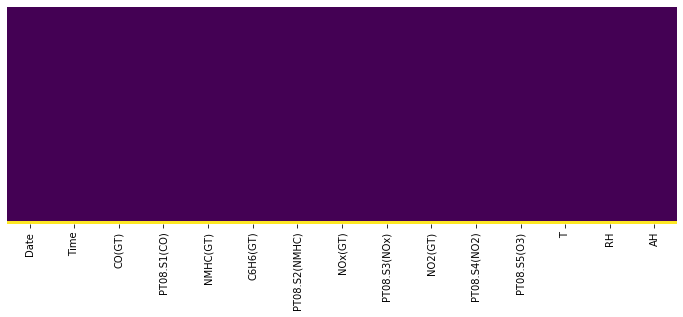

In [0]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
# drop empty rows
df.dropna(subset=["Time"], axis=0, inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


## Create a Datetime index (combine Date and Time columns)

In [0]:
#Split hour from time into new column, we'll need integer hours to add to the dates
df['Hour']=df['Time'].apply(lambda x: int(x.split('.')[0]))
df['Hour'].head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: int64

In [0]:
df['Date'] = pd.to_datetime(df.Date)

In [0]:
df[['Date','Hour']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 2 columns):
Date    9357 non-null datetime64[ns]
Hour    9357 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 219.3 KB


In [0]:
df['dt'] =  df['Date'] + pd.to_timedelta(df['Hour'], unit='h')

In [0]:
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,dt
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,2004-10-03 18:00:00
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,2004-10-03 19:00:00


In [0]:
# change datetime column precision to 'hour'
df['dt'].dtype

dtype('<M8[ns]')

In [0]:
df.drop(['Date','Time','Hour'], axis=1, inplace=True)

In [0]:
df.set_index('dt',inplace=True)

In [0]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
dt,,,,,,,,,,,,,
2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [0]:
df.index

DatetimeIndex(['2004-10-03 18:00:00', '2004-10-03 19:00:00',
               '2004-10-03 20:00:00', '2004-10-03 21:00:00',
               '2004-10-03 22:00:00', '2004-10-03 23:00:00',
               '2004-11-03 00:00:00', '2004-11-03 01:00:00',
               '2004-11-03 02:00:00', '2004-11-03 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='dt', length=9357, freq=None)

# Visualization

In [0]:
title = 'Title'
xlabel = 'X label'
ylabel = 'Y label'

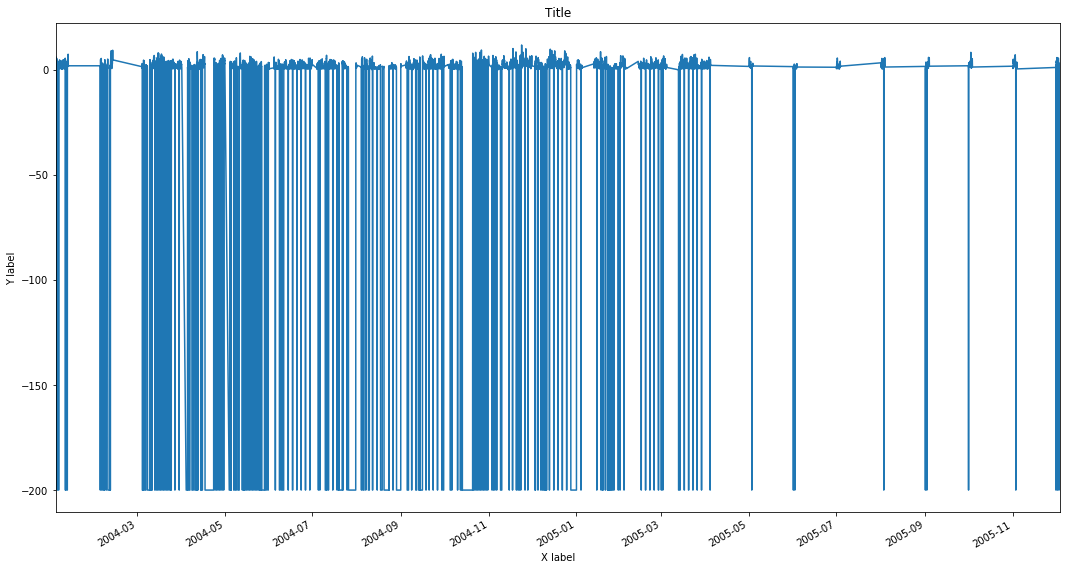

In [0]:
ax = df['CO(GT)'].plot(figsize=(18,10),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);
# df[['AH','RH','CO(GT)']].plot(figsize=(18,8)).autoscale(axis='x',tight=True);

In [0]:
df['CO(GT)'].min()

-200.0

In [0]:
missing_values = len(df[df['CO(GT)'] == -200])
missing_values

1683

In [0]:
total_values = len(df['CO(GT)'])
total_values

9357

In [0]:
missing_values/total_values

0.17986534145559474

In [0]:
# replace "-200" with NaN:

import numpy as np
df['CO(GT)'].replace(-200, np.nan,inplace=True)

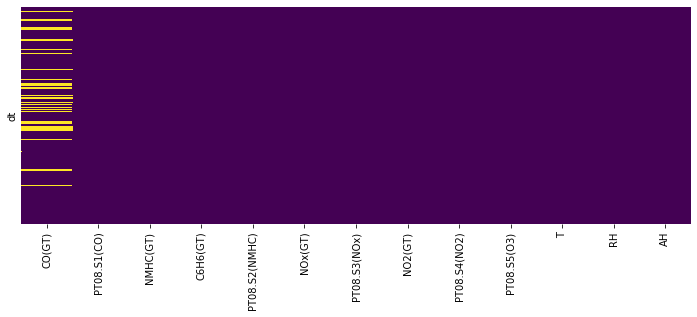

In [0]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
# replace with mean
mean = df['CO(GT)'].mean()
mean

2.1527495439145157

In [0]:
df['CO(GT)'].fillna(df['CO(GT)'].mean(), inplace=True)

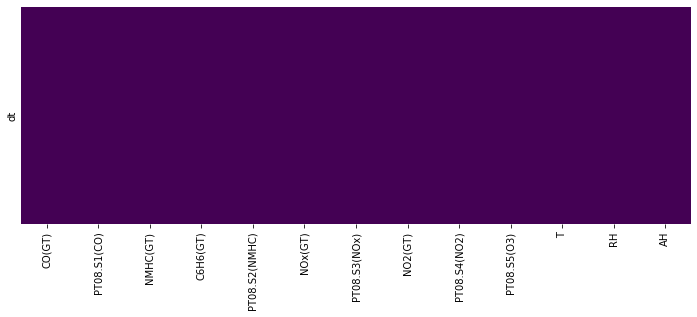

In [0]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

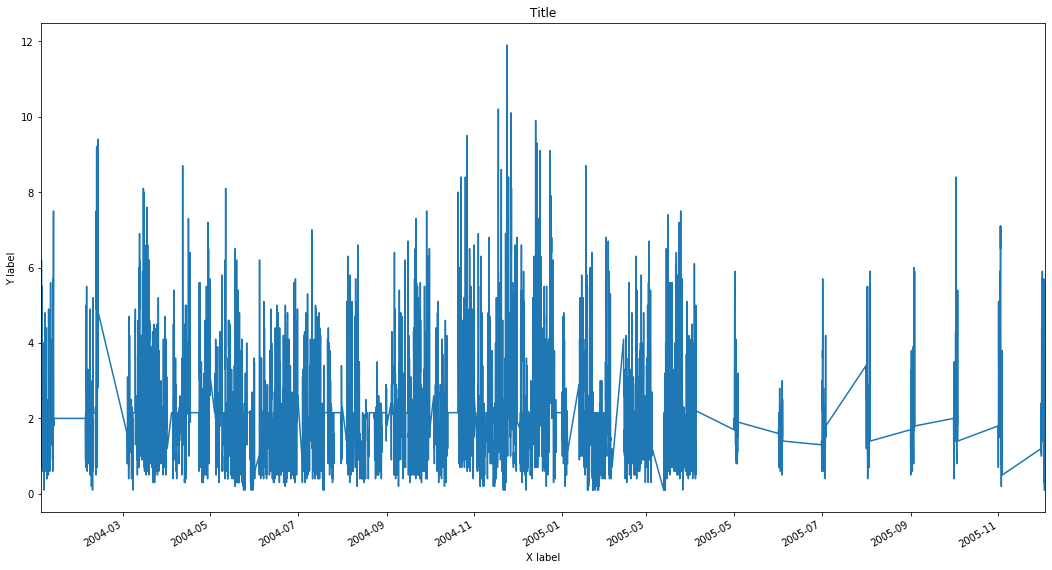

In [0]:
ax = df['CO(GT)'].plot(figsize=(18,10),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);
# df[['AH','RH','CO(GT)']].plot(figsize=(18,8)).autoscale(axis='x',tight=True);

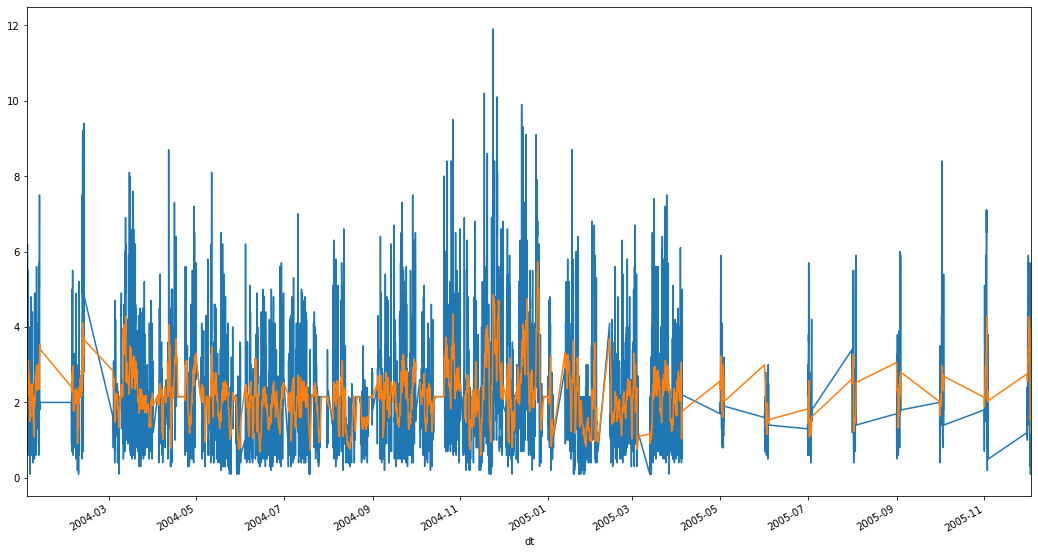

In [0]:
df['CO(GT)'].plot(figsize=(18,10)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['CO(GT)'].plot();

In [0]:
sub_df = df['2005-04-04':'2005-05-01']

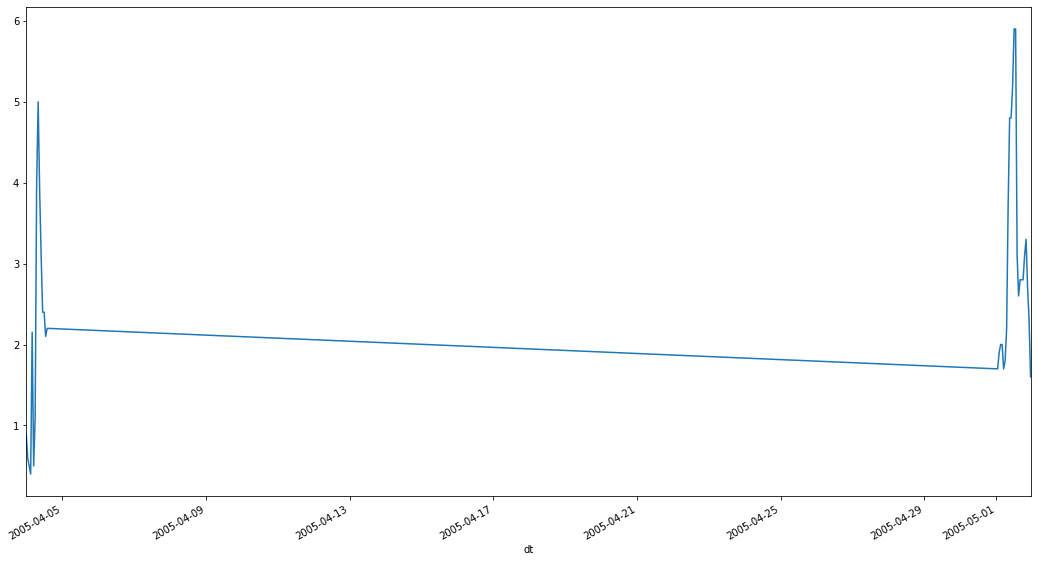

In [0]:
sub_df['CO(GT)'].plot(figsize=(18,10)).autoscale(axis='x',tight=True)

In [0]:
# The straight lines mean those dates are not present. 
df['2005-04-04 14:00:00':'2005-05-01 00:00:00']

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
dt,,,,,,,,,,,,,
2005-05-01 00:00:00,1.7,-200.0,-200.0,-200.0,-200.0,266.0,-200.0,129.0,-200.0,-200.0,-200.0,-200.0,-200.0000
2005-04-04 14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


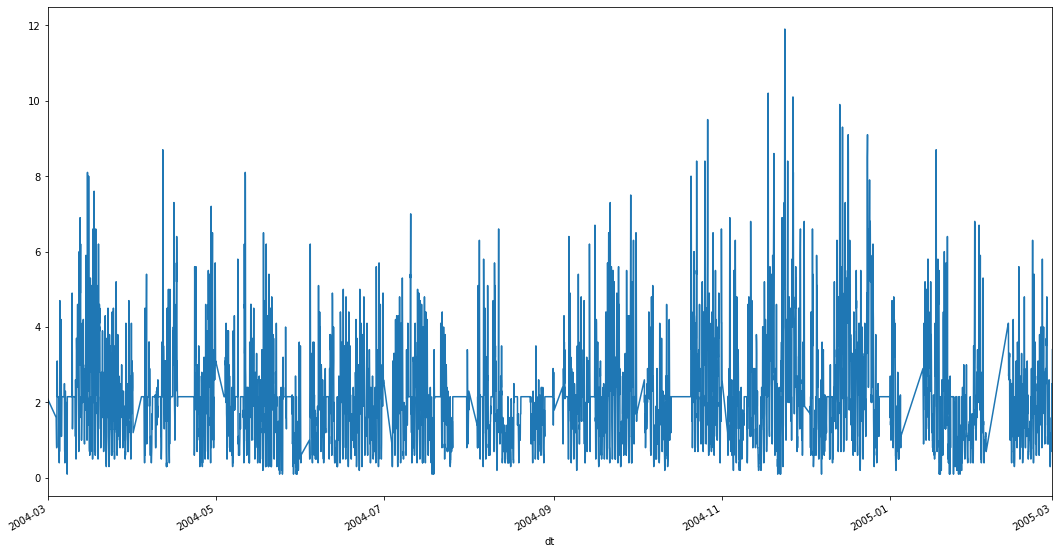

In [0]:
# middle portion
df['CO(GT)'].plot(xlim=['2004-03-01','2005-03-01'],figsize=(18,10))